Eps =  0


d:\Anaconda\envs\cuda\lib\site-packages\gym\envs\classic_control\mountain_car.py:171: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("MountainCar-v0", render_mode="rgb_array")
  gym.logger.warn(


Đã đến cờ tại ep = 0, reward = -5135.0
Eps =  1
Đã đến cờ tại ep = 1, reward = -10370.0
Eps =  2
Đã đến cờ tại ep = 2, reward = -6726.0
Eps =  3
Đã đến cờ tại ep = 3, reward = -3836.0
Eps =  4
Đã đến cờ tại ep = 4, reward = -3292.0
Eps =  5
Đã đến cờ tại ep = 5, reward = -3214.0
Eps =  6
Đã đến cờ tại ep = 6, reward = -3622.0
Eps =  7
Đã đến cờ tại ep = 7, reward = -2874.0
Eps =  8
Đã đến cờ tại ep = 8, reward = -1716.0
Eps =  9
Đã đến cờ tại ep = 9, reward = -7248.0
Eps =  10
Đã đến cờ tại ep = 10, reward = -1361.0
Eps =  11
Đã đến cờ tại ep = 11, reward = -2308.0
Eps =  12
Đã đến cờ tại ep = 12, reward = -1497.0
Eps =  13
Đã đến cờ tại ep = 13, reward = -2331.0
Eps =  14
Đã đến cờ tại ep = 14, reward = -1103.0
Eps =  15
Đã đến cờ tại ep = 15, reward = -2242.0
Eps =  16
Đã đến cờ tại ep = 16, reward = -1317.0
Eps =  17
Đã đến cờ tại ep = 17, reward = -788.0
Eps =  18
Đã đến cờ tại ep = 18, reward = -1361.0
Eps =  19
Đã đến cờ tại ep = 19, reward = -1061.0
Eps =  20
Đã đến cờ tại ep = 

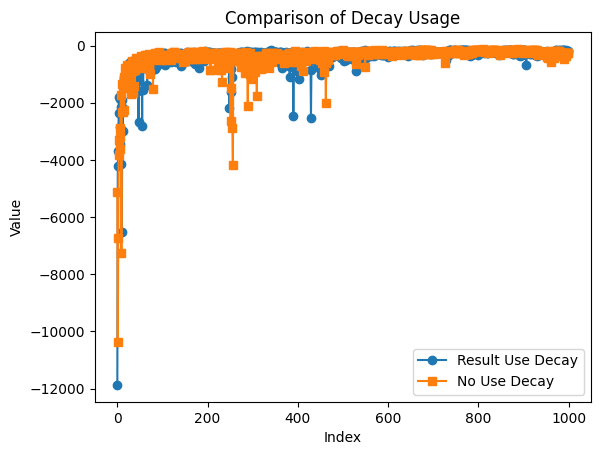

In [6]:
import random

import gym
import numpy as np
import matplotlib.pyplot as plt


No_use_decay = []

env = gym.make("MountainCar-v0")
env.reset()

c_learning_rate = 0.1
c_discount_value = 0.9
c_no_of_eps = 1000 # Số episode - constant
c_show_each = 1000

v_epsilon = 9/10000  # 
c_start_ep_epsilon_decay = 1 
c_end_ep_epsilon_decay = c_no_of_eps // 2
v_epsilon_decay = v_epsilon / (c_end_ep_epsilon_decay - c_start_ep_epsilon_decay)


q_table_size = [20, 20]
q_table_segment_size = (env.observation_space.high - env.observation_space.low) / q_table_size


# Hàm chuyển đổi từ real state về q_state
def convert_state(real_state):
    q_state = (real_state - env.observation_space.low) // q_table_segment_size
    return tuple(q_state.astype(int))


q_table = np.random.uniform(low=-2, high=0, size=(q_table_size + [env.action_space.n]))

max_ep_reward = 0
max_ep_action_list = []
max_start_state = None

for ep in range(c_no_of_eps):
    print("Eps = ", ep)
    done = False
    current_state, _ = env.reset()
    current_state = convert_state(current_state)
    ep_reward = 0
    ep_start_state = current_state
    action_list = []

    if ep % c_show_each == 0:
        show_now = True
    else:
        show_now = False

    while not done:
        if np.random.random() > v_epsilon: # v_epsilon start = 90%
            # Lấy argmax Q value của current_state
            action = np.argmax(q_table[current_state]) # exploit
        else:
            action = np.random.randint(0, env.action_space.n)  # explore

        action_list.append(action)

        # Hành động theo action đã lấy
        next_real_state, reward, done, _ , info = env.step(action=action)
        ep_reward += reward
        

        if show_now:
            env.render()

        if done:
            # Kiểm tra xem vị trí x có lớn hơn lá cờ không
            if next_real_state[0] >= env.goal_position:
                print("Đã đến cờ tại ep = {}, reward = {}".format(ep, ep_reward))
                if ep_reward > max_ep_reward:
                    max_ep_reward = ep_reward
                    max_ep_action_list = action_list
                    max_start_state  = ep_start_state
                    
        else:
            # Convert về q_state
            next_state = convert_state(next_real_state)

            # Update Q value cho (current_state, action)
            current_q_value = q_table[current_state + (action,)]

            new_q_value = (1 - c_learning_rate) * current_q_value + c_learning_rate * (reward + c_discount_value * np.max(q_table[next_state]))

            q_table[current_state + (action,)] = new_q_value

            current_state = next_state
    No_use_decay.append(ep_reward)
     
    # 5000  > epoch - "episode" > 1: bắt đầu giảm
    # if c_end_ep_epsilon_decay >= ep > c_start_ep_epsilon_decay:
    #     v_epsilon = v_epsilon - v_epsilon_decay

Result_use_decay = []

env = gym.make("MountainCar-v0")
env.reset()

c_learning_rate = 0.1
c_discount_value = 0.9
c_no_of_eps = 1000 # Số episode - constant
c_show_each = 1000

v_epsilon = 9/10000  # 
c_start_ep_epsilon_decay = 1 
c_end_ep_epsilon_decay = c_no_of_eps // 2
v_epsilon_decay = v_epsilon / (c_end_ep_epsilon_decay - c_start_ep_epsilon_decay)


q_table_size = [20, 20]
q_table_segment_size = (env.observation_space.high - env.observation_space.low) / q_table_size


# Hàm chuyển đổi từ real state về q_state
def convert_state(real_state):
    q_state = (real_state - env.observation_space.low) // q_table_segment_size
    return tuple(q_state.astype(int))


q_table = np.random.uniform(low=-2, high=0, size=(q_table_size + [env.action_space.n]))

max_ep_reward = 0
max_ep_action_list = []
max_start_state = None

for ep in range(c_no_of_eps):
    print("Eps = ", ep)
    done = False
    current_state, _ = env.reset()
    current_state = convert_state(current_state)
    ep_reward = 0
    ep_start_state = current_state
    action_list = []

    if ep % c_show_each == 0:
        show_now = True
    else:
        show_now = False

    while not done:
        if np.random.random() > v_epsilon: # v_epsilon start = 90%
            # Lấy argmax Q value của current_state
            action = np.argmax(q_table[current_state]) # exploit
        else:
            action = np.random.randint(0, env.action_space.n)  # explore

        action_list.append(action)

        # Hành động theo action đã lấy
        next_real_state, reward, done, _ , info = env.step(action=action)
        ep_reward += reward
        

        if show_now:
            env.render()

        if done:
            # Kiểm tra xem vị trí x có lớn hơn lá cờ không
            if next_real_state[0] >= env.goal_position:
                print("Đã đến cờ tại ep = {}, reward = {}".format(ep, ep_reward))
                if ep_reward > max_ep_reward:
                    max_ep_reward = ep_reward
                    max_ep_action_list = action_list
                    max_start_state  = ep_start_state
                    
        else:
            # Convert về q_state
            next_state = convert_state(next_real_state)

            # Update Q value cho (current_state, action)
            current_q_value = q_table[current_state + (action,)]

            new_q_value = (1 - c_learning_rate) * current_q_value + c_learning_rate * (reward + c_discount_value * np.max(q_table[next_state]))

            q_table[current_state + (action,)] = new_q_value

            current_state = next_state
            
    # 5000  > epoch - "episode" > 1: bắt đầu giảm
    if c_end_ep_epsilon_decay >= ep > c_start_ep_epsilon_decay:
        v_epsilon = v_epsilon - v_epsilon_decay
    Result_use_decay.append(ep_reward)

x_values = list(range(len(Result_use_decay)))
plt.plot(x_values, Result_use_decay, label="Result Use Decay", marker="o")
x_values = list(range(len(No_use_decay)))
plt.plot(x_values, No_use_decay, label="No Use Decay", marker="s")

# Thêm tiêu đề và nhãn
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Comparison of Decay Usage")
plt.legend()

# Hiển thị biểu đồ
plt.show()

Reached goal at episode 0 with reward -24289.0
Reached goal at episode 1 with reward -11655.0
Reached goal at episode 2 with reward -5362.0
Reached goal at episode 3 with reward -1584.0
Reached goal at episode 4 with reward -7596.0
Reached goal at episode 5 with reward -8702.0
Reached goal at episode 6 with reward -9672.0
Reached goal at episode 7 with reward -12029.0
Reached goal at episode 8 with reward -1819.0
Reached goal at episode 9 with reward -1570.0
Reached goal at episode 10 with reward -5890.0
Reached goal at episode 11 with reward -4525.0
Reached goal at episode 12 with reward -2150.0
Reached goal at episode 13 with reward -2546.0
Reached goal at episode 14 with reward -1716.0
Reached goal at episode 15 with reward -5560.0
Reached goal at episode 16 with reward -7411.0
Reached goal at episode 17 with reward -1951.0
Reached goal at episode 18 with reward -8288.0
Reached goal at episode 19 with reward -1772.0
Reached goal at episode 20 with reward -4729.0
Reached goal at epis

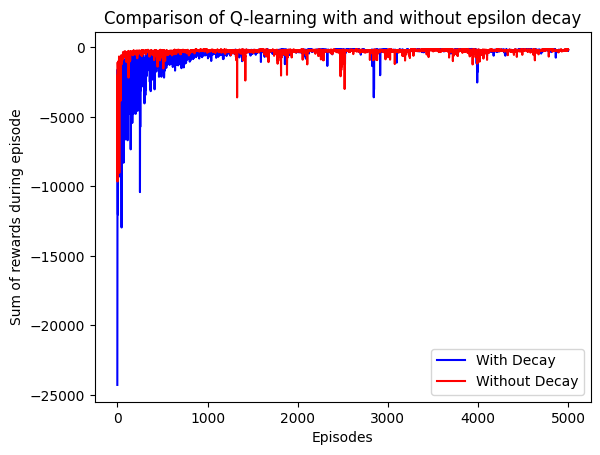

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

def train_q_learning(use_decay):
    env = gym.make("MountainCar-v0")
    env.reset()

    c_learning_rate = 0.1
    c_discount_value = 0.9
    c_no_of_eps = 2000  # Giảm xuống để chạy nhanh hơn
    v_epsilon = 9/10000 if use_decay else 0.1  # Khởi tạo epsilon khác nhau

    c_start_ep_epsilon_decay = 1
    c_end_ep_epsilon_decay = c_no_of_eps // 2
    v_epsilon_decay = v_epsilon / (c_end_ep_epsilon_decay - c_start_ep_epsilon_decay)  

    q_table_size = [20, 20]
    q_table_segment_size = (env.observation_space.high - env.observation_space.low) / q_table_size

    def convert_state(real_state):
        q_state = (real_state - env.observation_space.low) // q_table_segment_size
        return tuple(q_state.astype(int))

    q_table = np.random.uniform(low=-2, high=0, size=(q_table_size + [env.action_space.n]))
    rewards_per_episode = []

    for ep in range(c_no_of_eps):
        done = False
        current_state, _ = env.reset()
        current_state = convert_state(current_state)
        ep_reward = 0

        while not done:
            if np.random.random() > v_epsilon:
                action = np.argmax(q_table[current_state])  # Exploit
            else:
                action = np.random.randint(0, env.action_space.n)  # Explore

            next_real_state, reward, done, _, _ = env.step(action)
            ep_reward += reward

            if done:
                if next_real_state[0] >= env.goal_position:
                    print(f"Reached goal at episode {ep} with reward {ep_reward}")
            else:
                next_state = convert_state(next_real_state)
                current_q_value = q_table[current_state + (action,)]
                new_q_value = (1 - c_learning_rate) * current_q_value + c_learning_rate * (
                        reward + c_discount_value * np.max(q_table[next_state]))
                q_table[current_state + (action,)] = new_q_value
                current_state = next_state

        rewards_per_episode.append(ep_reward)

        if use_decay and c_end_ep_epsilon_decay >= ep > c_start_ep_epsilon_decay:
            v_epsilon = max(0.01, v_epsilon - v_epsilon_decay)  # Đảm bảo epsilon không về 0

    return rewards_per_episode

# Train với và không có epsilon decay
rewards_with_decay = train_q_learning(use_decay=True)
rewards_without_decay = train_q_learning(use_decay=False)

# Vẽ biểu đồ
episodes = range(len(rewards_with_decay))
plt.plot(episodes, rewards_with_decay, label="With Decay", color='blue')
plt.plot(episodes, rewards_without_decay, label="Without Decay", color='red')

plt.xlabel("Episodes")
plt.ylabel("Sum of rewards during episode")
plt.title("Comparison of Q-learning with and without epsilon decay")
plt.legend()
plt.show()
